## QUESTION 1

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import pyarrow
import fastparquet
import pickle
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')
df.head()

,index,Unnamed: 0,Email Text,Email Type
0,0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [3]:
df['tokens'] = df['Email Text'].apply(lambda text: text.split())
print(df[['Email Text', 'tokens']].head())

                                          Email Text  \
0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1  the other side of * galicismos * * galicismo *...   
2  re : equistar deal tickets are you still avail...   
3  \nHello I am your hot lil horny toy.\n    I am...   
4  software at incredibly low prices ( 86 % lower...   

                                              tokens  
0  [re, :, 6, ., 1100, ,, disc, :, uniformitarian...  
1  [the, other, side, of, *, galicismos, *, *, ga...  
2  [re, :, equistar, deal, tickets, are, you, sti...  
3  [Hello, I, am, your, hot, lil, horny, toy., I,...  
4  [software, at, incredibly, low, prices, (, 86,...  


### To clean the tokens for language processing, I would first strip commas, astrixes, and similar symbols from the text. I would then analyze types of words that appear to be associated with phishing (ex: sexual content). I would also look at emails with repeating words, as repetitive language seems to indicate phishing. Subsequently, I might try to find correlations between these variables before running a predictive classification model using an 80/20 testing/training split.

# QUESTION 2

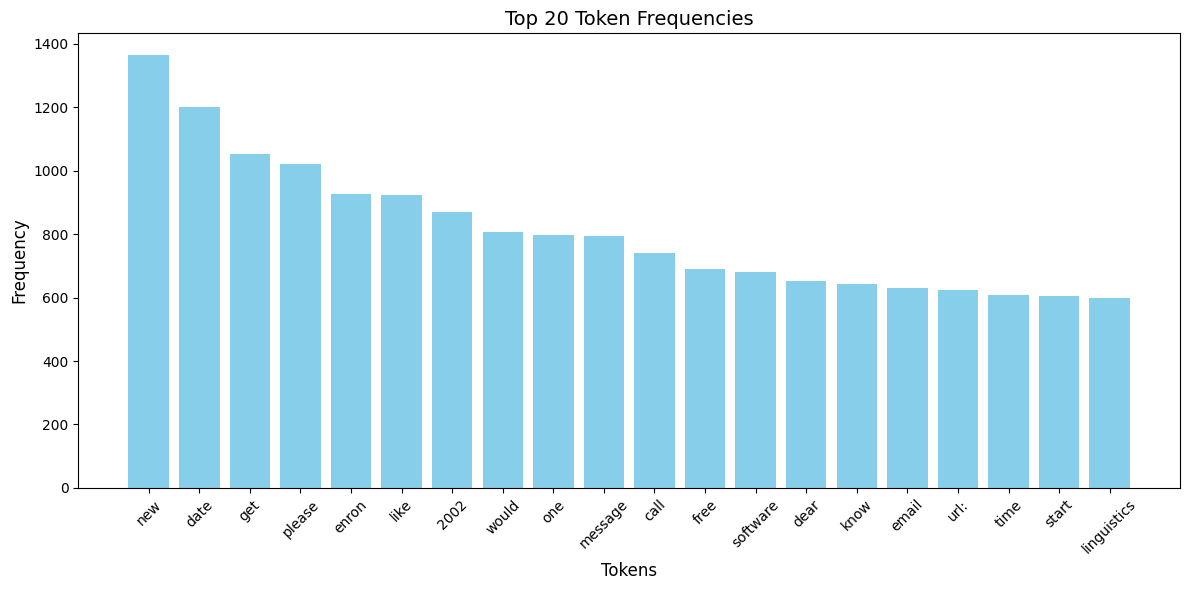

In [4]:
with open('/workspace/PCA/05_PCA/all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)

token_count = Counter(all_tokens)
token_freq = token_count.most_common()
tokens, counts = zip(*token_freq)


tokens, counts = zip(*token_freq)

# Plot the histogram
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(tokens[:20], counts[:20], color='skyblue')  # Show the top 20 tokens for readability
plt.xlabel('Tokens', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 20 Token Frequencies', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()  # Display the plot


### This histogram reveals some interesting data. I'm surprised that the word "linguistics" is the 20th most used word in this set of phishing emails. Tech-related buzzwords such as software, email, url, and message tend to be very common, which makes sense.

# QUESTION 3

In [ ]:
from sklearn.model_selection import train_test_split

file_path = '/workspace/PCA/05_PCA/Phishing_clean.parquet'
df = pd.read_parquet(file_path)

X = df.drop(columns=['Email Type'])
y = df['Email Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# code generated using chat gpt:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on both the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

# Optional: Get classification report for more detailed performance metrics
print("Classification report (Test set):")
print(classification_report(y_test, y_test_pred))


Training accuracy: 0.9666599584088013
Test accuracy: 0.941239602897773
Classification report (Test set):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2209
           1       0.91      0.95      0.93      1518

    accuracy                           0.94      3727
   macro avg       0.94      0.94      0.94      3727
weighted avg       0.94      0.94      0.94      3727



In [7]:
# code generated using chat gpt:

# Get the feature names (tokens)
tokens = X.columns

# Get the model's coefficients
coefficients = model.coef_[0]

# Create a DataFrame of words and their corresponding coefficients
coef_df = pd.DataFrame({'word': tokens, 'coefficient': coefficients})

# Sort by absolute coefficient value (most influential words)
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='abs_coefficient', ascending=False)

# Display the top 10 most influential words (with largest coefficients)
print("Top 10 most influential words based on coefficients:")
print(coef_df_sorted[['word', 'coefficient']].head(10))


Top 10 most influential words based on coefficients:
          word  coefficient
4        enron    -4.308871
16        url:    -4.144157
35       vince    -3.083769
22      wrote:    -3.058260
88      louise    -2.956818
168  forwarded    -2.571457
25    language    -2.500870
103      wrote    -2.471931
205      daren    -2.410629
818       cnet    -2.268266
